In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [3]:
insurance = pd.read_csv('insurance.csv')
print(insurance)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\darad\AppData\Local\Temp\ipykernel_14712\442108322.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

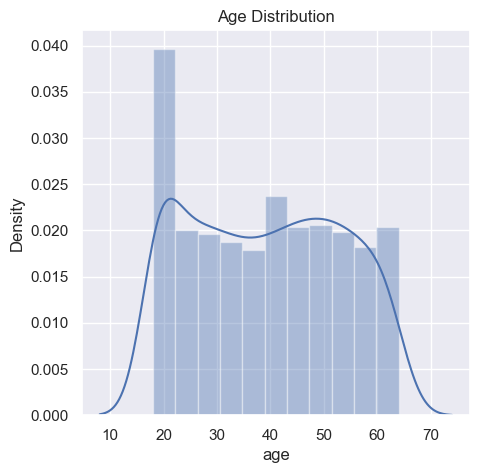

In [9]:
# Age distribution Across The Dataset ## 
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance['age'])
plt.title('Age Distribution')
plt.show

Sex Distribution Across The  Dataset 

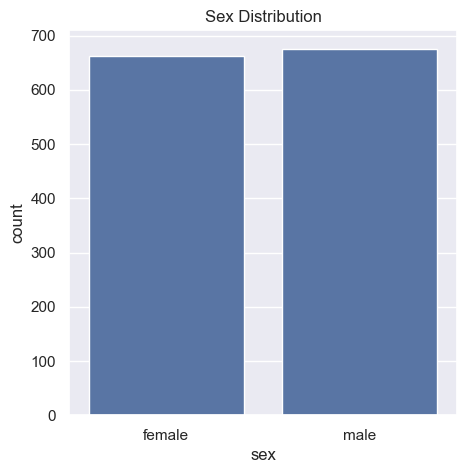

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance)
plt.title('Sex Distribution')
plt.show()

Determining the Number of Male and Female in the Dataset

In [13]:
insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\darad\AppData\Local\Temp\ipykernel_14712\300981825.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


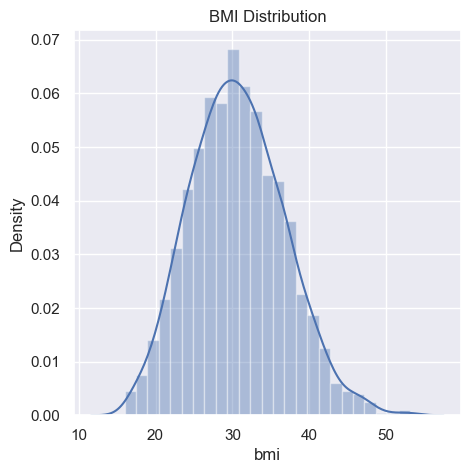

In [14]:
# BMI distribution Across The Dataset ##
plt.figure(figsize=(5,5))
sns.distplot(insurance['bmi'])
plt.title('BMI Distribution')
plt.show()

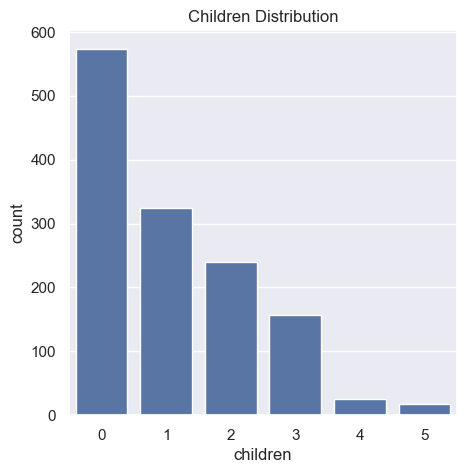

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=insurance)
plt.title('Children Distribution')
plt.show()

In [16]:
insurance['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Counting The Smokers And Non Smokers In The Dataset

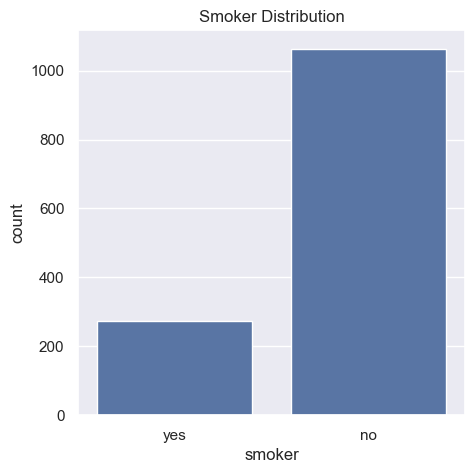

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=insurance)
plt.title('Smoker Distribution')
plt.show()

In [19]:
insurance['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Regionwise Insurance Charges

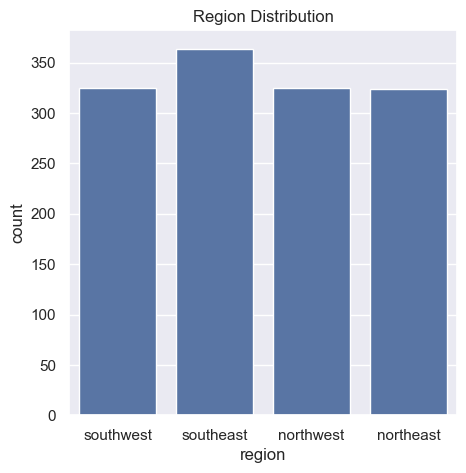

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance)
plt.title('Region Distribution')
plt.show()

In [22]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\darad\AppData\Local\Temp\ipykernel_14712\2244887402.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


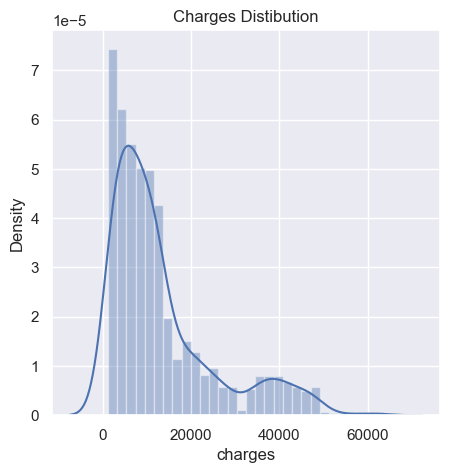

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(insurance['charges'])
plt.title('Charges Distibution')
plt.show()

In [24]:
insurance_n = [i for i in insurance.columns if insurance[i].dtypes != 'object']
insurance_n

['age', 'bmi', 'children', 'charges']

In [25]:
insurance_num = insurance[insurance_n]
insurance_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


encoding the categorical features

In [27]:
#### encoding the sex & smoker colum using get dummies ####
insurance_m= pd.get_dummies(insurance[['sex','smoker']],dtype=int,)
insurance_m

,sex_female,sex_male,smoker_no,smoker_yes
0,1,0,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0
...,...,...,...,...
1333,0,1,1,0
1334,1,0,1,0
1335,1,0,1,0
1336,1,0,1,0


In [28]:
insurance_cat = insurance_m.drop(columns=['sex_male','smoker_no'],axis=1)
insurance_cat

,sex_female,smoker_yes
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1333,0,0
1334,1,0
1335,1,0
1336,1,0


In [29]:
### encoding 'region' column ####
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
insurance['region']

0       1
1       0
2       0
3       3
4       3
       ..
1333    3
1334    2
1335    0
1336    1
1337    3
Name: region, Length: 1338, dtype: int64

In [30]:
insurance['region']=insurance['region'].astype(object)
insurance['region'].dtype

dtype('O')

In [31]:
### concatinating the object columns together ###
insurance_cat['region'] = insurance['region']
insurance_cat

,sex_female,smoker_yes,region
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,3
4,0,0,3
...,...,...,...
1333,0,0,3
1334,1,0,2
1335,1,0,0
1336,1,0,1


In [32]:
insurance_combined = pd.concat([insurance_num,insurance_cat],axis=1)
insurance_combined

,age,bmi,children,charges,sex_female,smoker_yes,region
0,19,27.900,0,16884.92400,1,1,1
1,18,33.770,1,1725.55230,0,0,0
2,28,33.000,3,4449.46200,0,0,0
3,33,22.705,0,21984.47061,0,0,3
4,32,28.880,0,3866.85520,0,0,3
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,3
1334,18,31.920,0,2205.98080,1,0,2
1335,18,36.850,0,1629.83350,1,0,0
1336,21,25.800,0,2007.94500,1,0,1


Outliers detection from the dataset

In [34]:
df=pd.DataFrame(insurance_combined)

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the Interquartile Range (IQR) for each column
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers in each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (df < lower_bound) | (df > upper_bound)

# Count outliers in each column
outlier_counts = outliers.sum()
outlier_counts

age             0
bmi             9
children        0
charges       139
sex_female      0
smoker_yes    274
region          0
dtype: int64

Removing the outliers from the BMI column as charges column is the target variable so it can not affect the process

smoker_yes is the categorical coumn encoded by get dummies so there is no outliers

In [37]:
### Removing the outliers from the BMI column##

column = 'bmi'
df_filtered = df.copy()  # Make a copy to preserve the original DataFrame

# Calculate Q1, Q3, IQR, lower_bound, and upper_bound for the specific column
Q1_col = df[column].quantile(0.25)
Q3_col = df[column].quantile(0.75)
IQR_col = Q3_col - Q1_col

lower_bound_col = Q1_col - 1.5 * IQR_col
upper_bound_col = Q3_col + 1.5 * IQR_col

# Filter out outliers from the specific column
df_filtered = df_filtered[(df_filtered[column] >= lower_bound_col) & (df_filtered[column] <= upper_bound_col)]
df_filtered

,age,bmi,children,charges,sex_female,smoker_yes,region
0,19,27.900,0,16884.92400,1,1,1
1,18,33.770,1,1725.55230,0,0,0
2,28,33.000,3,4449.46200,0,0,0
3,33,22.705,0,21984.47061,0,0,3
4,32,28.880,0,3866.85520,0,0,3
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,3
1334,18,31.920,0,2205.98080,1,0,2
1335,18,36.850,0,1629.83350,1,0,0
1336,21,25.800,0,2007.94500,1,0,1


 splitting data into X & Y

In [39]:
X=df_filtered.drop(columns = 'charges',axis=1)
X

,age,bmi,children,sex_female,smoker_yes,region
0,19,27.900,0,1,1,1
1,18,33.770,1,0,0,0
2,28,33.000,3,0,0,0
3,33,22.705,0,0,0,3
4,32,28.880,0,0,0,3
...,...,...,...,...,...,...
1333,50,30.970,3,0,0,3
1334,18,31.920,0,1,0,2
1335,18,36.850,0,1,0,0
1336,21,25.800,0,1,0,1


In [40]:
Y = df_filtered['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

Splitting the data in Training and Test set Using sklearn we split 75% of our data into training set and rest in test set. Setting random_state will give the same training and test set everytime on running the code.

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75 , random_state=12)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((996, 6), (996,), (333, 6), (333,))

Performing Linear Regression

In [44]:
# Representing LinearRegression as lm
lm = LinearRegression()
lm

LinearRegression()

In [45]:
# fit the model to the training data
lm.fit(X_train,Y_train)

LinearRegression()

Step 5 : Model Evaluation

In [47]:
### prediction on training data ###
training_data_prediction =lm.predict(X_train)
testing_data_prediction=lm.predict(X_test)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value training : ', r2_train)
## predictions on test data ##
r2_test = metrics.r2_score(Y_test,testing_data_prediction)
print('R squred value testing :',r2_test)

R squared value training :  0.7371733327027765
R squred value testing : 0.7819812241435565


In [48]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [49]:
mse=mean_squared_error(Y_test,y_pred)
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r2_test)

Mean_Squared_Error : 33113913.01761122
Root_Mean_Squared_Error : 5754.4689605220065
r_square_value : 0.7819812241435565


In [50]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
1091,11286.53870,11683.794644
731,10065.41300,8856.333322
717,13112.60480,12006.715574
343,13981.85035,16306.395452
787,1917.31840,5800.443634
...,...,...
1089,10577.08700,9359.742020
367,8017.06115,7907.766568
436,2254.79670,4129.834602
573,31620.00106,16355.057547


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=12)
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=12)

In [52]:
y_pred_rf = rf.predict(X_test)

In [53]:
mse =mean_squared_error(Y_test,y_pred_rf)
mse

19030715.16453873

In [54]:
r2_rf =r2_score(Y_test,y_pred_rf)
r2_rf

0.8747036261876159

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [56]:
y_pred_dt=dt.predict(X_test)

In [57]:
r2_dt =r2_score(Y_test,y_pred_dt)
r2_dt

0.7548630795553827

Applying the hyperparameter tunning to find the best model

In [59]:
param_grid = { 'max_depth': list(range(1,101)), 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 5, 10],
              'max_features': ['sqrt', 'log2']}

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

In [61]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error',error_score='raise')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [62]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_split=10)

In [63]:
y_pred_dt_hp=best_model.predict(X_test)

In [64]:
mse_dt_hp = mean_squared_error(Y_test, y_pred_dt_hp)
r2_dt_hp = r2_score(Y_test, y_pred_dt_hp)


print('mean_error:',mse_dt_hp)
print('r2_score:',r2_dt_hp)

mean_error: 48592050.48893634
r2_score: 0.6800746756108793


In [65]:
data2={ 'Model':['Linear Regression','Random Forest','Decision Tree','Decision Tree with GridSearchCV'],
      'R2 squared Value':[0.78,0.87,0.76,0.72]}

df5=pd.DataFrame(data2)

C:\Users\darad\AppData\Local\Temp\ipykernel_14712\3552581692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 squared Value', data=df5, palette='viridis')


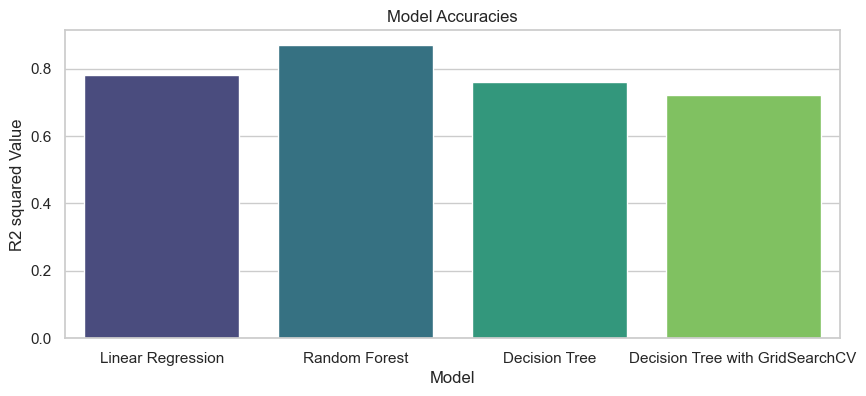

In [66]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Model', y='R2 squared Value', data=df5, palette='viridis')

# Add title and labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('R2 squared Value')

# Display the plot
plt.show()
